# 1. Perkenalan
      > Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan *objective* yang ingin dicapai.
  - Name : Reyki Seprianza
  - Batch : FTDS009
## Background Story
>Sebagai seorang Human Resource Data Scientist, saya ingin memprediksi [Employee Attrition](https://www.toolbox.com/hr/engagement-retention/articles/what-is-attrition-complete-guide/) dari sebuah perusahaan.
>Disini saya menggunakan Dataset dari [IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset) sebagai data training.


## About Dataset
>Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

>Education
1. 'Below College'
2. 'College'
3. 'Bachelor'
4. 'Master'
5. 'Doctor'

>EnvironmentSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

>JobInvolvement
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

>JobSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

>PerformanceRating
1. 'Low'
2. 'Good'
3. 'Excellent'
4. 'Outstanding'

>RelationshipSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

>WorkLifeBalance
1. 'Bad'
2. 'Good'
3. 'Better'
4. 'Best'


# 2. Import Libraries
      > *Cell* pertama pada *notebook* **harus berisi dan hanya berisi** semua *library* yang digunakan dalam *project*.
   

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno
warnings.filterwarnings('ignore')
import plotly.express as px

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,accuracy_score, plot_roc_curve
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import  RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

#models
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import   SVC
from sklearn.ensemble import RandomForestClassifier

#evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import PrecisionRecallDisplay







# 3. Data Loading
      > Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.
  

In [2]:
#definisi randomstate agar tidak berubah kemudian dan set display menampilkan seluruh kolom
random_state = 46
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df0=df.copy()
df0.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


#     4. Exploratory Data Analysis (EDA)
      > Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.
   

In [4]:
df0.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [5]:
df0.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Data yang kita miliki tidak mengandung missing value.

<AxesSubplot:xlabel='Attrition', ylabel='count'>

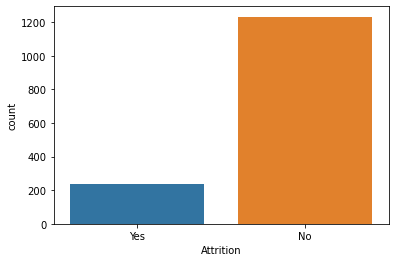

In [6]:
sns.countplot(x='Attrition', data=df0)

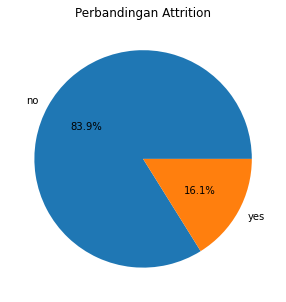

In [7]:
att = df0['Attrition'].value_counts().to_dict()
plt.figure(figsize=(5,5),facecolor='white')
fig = plt.pie(att.values(), labels=['no','yes'], autopct='%1.1f%%')
plt.title('Perbandingan Attrition')
plt.show()

Data yang kita miliki imbalance, data Attrition `No` ukuranya 6x lipat dari pada `Yes`

In [8]:
age_att=df0.groupby(['Age','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(age_att,x='Age',y='Counts',color='Attrition',title='Usia dan Resign ')

Bisa di ambil kesimpulan dari grafik di atas:
1. Pada dataset ini tingkat tertinggi karyawan meningglkan perusahaan berada di usia 30tahunan akan tetapi seiring dengan berjalanya waktu tingkat karwayan menginggalkan peusahaan menurun di iringi dengan usia yang semakin bertambah
2. Hal ini bisa saja di sebabkan oleh pada diri karyawan ingin mencari perusahaan yang memang sesuai dengan passion pribadinya, ini terjadi pada usia awal sampai menginjak usia 30 tahunan

In [9]:
rate_att=df0.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
rate_att['MonthlyIncome']=round(rate_att['MonthlyIncome'],-3)
rate_att=rate_att.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
fig=px.line(rate_att,x='MonthlyIncome',y='Counts',color='Attrition',title='Gaji per bulan di dalam perusahaan dan Resign')
fig.show()

Bisa di ambil kesimpulan dari grafik di atas:
1. Pada rate gaji yang sama jumlah karyawan yang meninggalkan perusaahan lebih sedikit dari pada yang tidak meninggalkan perusahaan
2. Data terbanyak karyawan meninggalkan perusahaan adalah pada rate gaji 2000, kemungkinan karyawan tersebut sudah merasakan saatnya mengganti perusahaan dengan harapan bisa mendapatkan gaji lebih besar
3. Di rentan gaji 10.000 ke atas karyawan yang meninggalkan perusahaan secara signifikan berkurang 

In [10]:
sats_att=df0.groupby(['EnvironmentSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(sats_att,x='EnvironmentSatisfaction',y='Counts',color='Attrition',title='Kenyamanan lingkungan kerja dan Resign')

>EnvironmentSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

Bisa di ambil kesimpulan dari grafik di atas:
1. kenyamanan lingkungan berkerja pada level `High` dan `Very Hight` tidak terlalu berpengaruh pada karyawan yang meninggalkan perusahaan
2. Pada level EnvironmentSatisfaction `Low`  berbedaan orang yang resign dan tidak resign mencapai 100 orang 
3. Bisa di ambil kesimpulan saat EnvironmentSatisfaction `Low` meningkatkan keinginan seseorang untuk resign

In [11]:
yrscr_att=df0.groupby(['YearsInCurrentRole','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(yrscr_att,x='YearsInCurrentRole',y='Counts',color='Attrition',title='Usia kerja dan Resign')

Bisa di ambil kesimpulan dari grafik di atas:
1. Pada usia kerja 2 dan 7 tahun karyawan paling banyak resign
2. Semakin lama masa kerja seseorang semakin kecil juga tingkat resign
3. Bisa di asumsikan ketika orang ini lama di suatu perusahaan dia menemukan kecocokan yang membuat orang ini betah, dan pada masa mula kerja menjadi fase resign terbesar karena masih di fase membangun kecocokan dengan lingkungan kerja

In [12]:
cardinal = df0.select_dtypes(include='object')
for uniq in cardinal : 
  print(f'jumlah cardinality pada kolom {uniq} : ',len(cardinal[uniq].unique()))

jumlah cardinality pada kolom Attrition :  2
jumlah cardinality pada kolom BusinessTravel :  3
jumlah cardinality pada kolom Department :  3
jumlah cardinality pada kolom EducationField :  6
jumlah cardinality pada kolom Gender :  2
jumlah cardinality pada kolom JobRole :  9
jumlah cardinality pada kolom MaritalStatus :  3
jumlah cardinality pada kolom Over18 :  1
jumlah cardinality pada kolom OverTime :  2


untuk jumlah cardinality tidak akan di lakukan pengurangan

<AxesSubplot:>

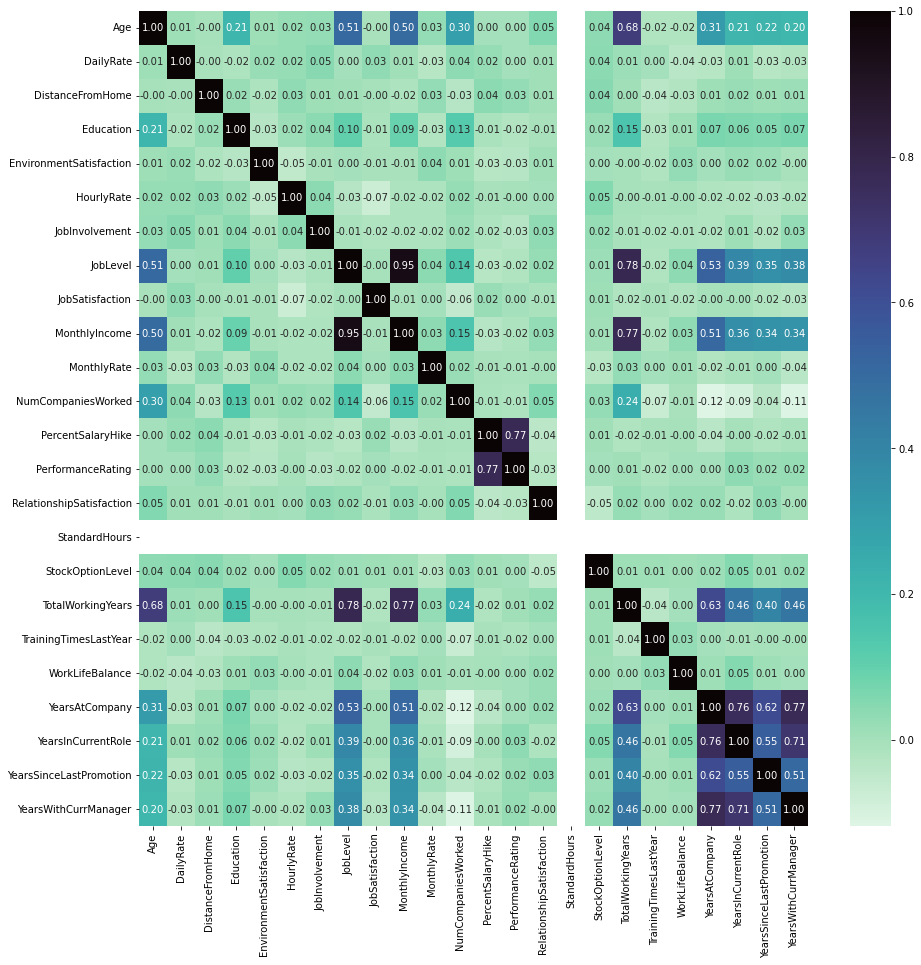

In [13]:
X=df0[['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction','StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
y=df0[['Attrition']].values.ravel()
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True,fmt='.2f',cmap='mako_r')

In [14]:
cor_matrix = X.corr().abs()
cor_matrix

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,0.019621,0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,0.004985,0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,0.037848,0.034055,0.009932,0.033229,0.026363
DistanceFromHome,0.001686,0.004985,1.000000,0.021042,0.016075,0.031131,0.008783,0.005303,0.003669,0.017014,0.027473,0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,0.036942,0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,0.016806,0.021042,1.000000,0.027128,0.016775,0.042438,0.101589,0.011296,0.094961,0.026084,0.126317,0.011111,0.024539,0.009118,NaN,0.018422,0.148280,0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,0.016075,0.027128,1.000000,0.049857,0.008278,0.001212,0.006784,0.006259,0.037600,0.012594,0.031701,0.029548,0.007665,NaN,0.003432,0.002693,0.019359,0.027627,0.001458,0.018007,0.016194,0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,0.049857,1.000000,0.042861,0.027853,0.071335,0.015794,0.015297,0.022157,0.009062,0.002172,0.001330,NaN,0.050263,0.002334,0.008548,0.004607,0.019582,0.024106,0.026716,0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,0.008278,0.042861,1.000000,0.012630,0.021476,0.015271,0.016322,0.015012,0.017205,0.029071,0.034297,NaN,0.021523,0.005533,0.015338,0.014617,0.021355,0.008717,0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,0.027853,0.012630,1.000000,0.001944,0.950300,0.039563,0.142501,0.034730,0.021222,0.021642,NaN,0.013984,0.782208,0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,0.004892,0.030571,0.003669,0.011296,0.006784,0.071335,0.021476,0.001944,1.000000,0.007157,0.000644,0.055699,0.020002,0.002297,0.012454,NaN,0.010690,0.020185,0.005779,0.019459,0.003803,0.002305,0.018214,0.027656
MonthlyIncome,0.497855,0.007707,0.017014,0.094961,0.006259,0.015794,0.015271,0.950300,0.007157,1.000000,0.034814,0.149515,0.027269,0.017120,0.025873,NaN,0.005408,0.772893,0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


In [15]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.70)]
print(); print(to_drop)


['MonthlyIncome', 'PerformanceRating', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager']


In [16]:
df['StandardHours']

0       80
1       80
2       80
3       80
4       80
        ..
1465    80
1466    80
1467    80
1468    80
1469    80
Name: StandardHours, Length: 1470, dtype: int64

Data dengan tingkat korelasi di atas 70% antar features akan di drop dan Features Standard Hours akan di drop karena isinya sama

# 5. Data Preprocessing
      > Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.   
   

In [17]:
df0=df0.drop(['StandardHours','MonthlyIncome', 'PerformanceRating', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager'], axis=1)
df0.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,19479,8,Y,Yes,11,1,0,0,1,6,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,24907,1,Y,No,23,4,1,3,3,10,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2396,6,Y,Yes,15,2,0,3,3,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,23159,1,Y,Yes,11,3,0,3,3,8,3
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,16632,9,Y,No,12,4,1,3,3,2,2


In [18]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [19]:
#mengambil data inference 
df_inf = df0.sample(1, random_state=random_state) 
df_train = df0.drop(df_inf.index)

#reset index dari data yang di ambil
df_train = df_train.reset_index(drop=True)
df_inf = df_inf.reset_index(drop=True)

#memecah sataset dan label
X = df0.drop('Attrition', axis=1)
y= df0['Attrition'] == "Yes"

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=random_state, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1176, 28), (294, 28), (1176,), (294,))

In [20]:
#melakukan treatment SMOTE Over dan Undersampling agar data tidak terlalu imbalance
n_sample = len(y_train.values)
n_pos = (y_train == 1).sum()
n_neg = n_sample - n_pos

print(n_sample, n_pos, n_neg)

oversample=RandomOverSampler(sampling_strategy=float((n_pos*2.)/n_neg))
undersample=RandomUnderSampler(sampling_strategy=float(n_pos/(n_neg/4)))

_X_train, _y_train = oversample.fit_resample(X_train, y_train )
_X_train,_y_train = undersample.fit_resample(_X_train, _y_train)    

_y_train.value_counts(normalize=False)

1176 190 986


False    492
True     380
Name: Attrition, dtype: int64

In [21]:
n_sample = len(_y_train.values)
n_pos = (_y_train == "Yes").sum()
n_neg = n_sample - n_pos

weight_for_0 = (1 / n_neg) * (n_sample / 2.0)
weight_for_1 = (1 / n_pos) * (n_sample / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}
class_weight

{0: 0.5, 1: inf}

In [22]:
# memisahkan data numerik dan categorical

num_cols = [col for col in X.columns if X[col].dtypes != 'O']
cat_cols = [col for col in X.columns if X[col].dtypes == 'O']

print('Numerical Columns:', num_cols)
print('Categorical Columns:', cat_cols)

Numerical Columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion']
Categorical Columns: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [23]:
X[cat_cols]

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


List dari Cat_cols akan di scaling menggunakan LabelEncoder

In [24]:
X[num_cols]

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,1102,1,2,1,1,2,94,3,2,4,19479,8,11,1,0,0,1,6,0
1,49,279,8,1,1,2,3,61,2,2,2,24907,1,23,4,1,3,3,10,1
2,37,1373,2,2,1,4,4,92,2,1,3,2396,6,15,2,0,3,3,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,23159,1,11,3,0,3,3,8,3
4,27,591,2,1,1,7,1,40,3,1,2,16632,9,12,4,1,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,4,12290,4,17,3,1,3,3,5,0
1466,39,613,6,1,1,2062,4,42,2,3,1,21457,4,15,1,1,5,3,7,1
1467,27,155,4,3,1,2064,2,87,4,2,2,5174,1,20,2,1,0,3,6,0
1468,49,1023,2,3,1,2065,4,63,2,2,2,13243,2,14,4,0,3,2,9,0


List dari Num_cols akan di scaling menggunakan StandardScaler

In [25]:
X[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [26]:
#membuat pipieline scaler dan encoder

data_pipe = ColumnTransformer([
    ('pipe_num', StandardScaler(), num_cols),
    ('pipe_cat', OrdinalEncoder(), cat_cols)
])

# 6. Model Definition
      > Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.


In [27]:
#pipeline decision tree
dt_pipeline = Pipeline([
    ('preprocessing', data_pipe),
    ('model', DecisionTreeClassifier())
])

#pipeline SVC
svc_pipeline = Pipeline([
    ('preprocessing', data_pipe),
    ('model', SVC(probability=True, max_iter=100))
])


#pipeling AdaBoost
ada_pipeline = Pipeline([
    ('preprocessing', data_pipe),
    ('model', AdaBoostClassifier())
])

#pipeline MLP Classifier
mlp_pipeline = Pipeline([
    ('preprocessing', data_pipe),
    ('model', MLPClassifier())
])

#  7. Model Training
      > Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.
  

In [28]:
#Training model

mlp_pipeline.fit(X_train, y_train)
ada_pipeline.fit(X_train, y_train)
dt_pipeline.fit(X_train, y_train)
svc_pipeline.fit(X_train, y_train);

#  8. Model Evaluation
      > Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. **Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya**.


Adaboost
              precision    recall  f1-score   support

       False       0.88      0.94      0.91       247
        True       0.53      0.34      0.42        47

    accuracy                           0.85       294
   macro avg       0.71      0.64      0.66       294
weighted avg       0.83      0.85      0.83       294



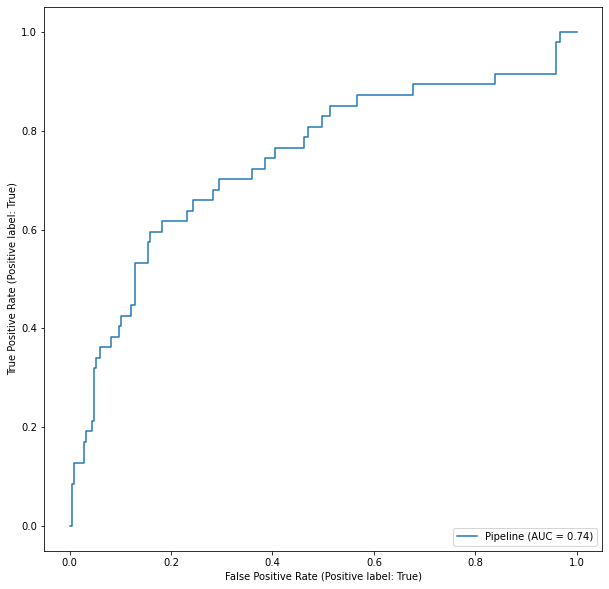

In [29]:
print('Adaboost')
print(classification_report(y_test, ada_pipeline.predict_proba(X_test)[:,1] >.5))


fig,ax = plt.subplots(figsize=(10,10))
RocCurveDisplay.from_estimator(ada_pipeline, X_test, y_test,ax=ax)

MLP Classifier
              precision    recall  f1-score   support

       False       0.88      0.96      0.91       247
        True       0.56      0.30      0.39        47

    accuracy                           0.85       294
   macro avg       0.72      0.63      0.65       294
weighted avg       0.83      0.85      0.83       294



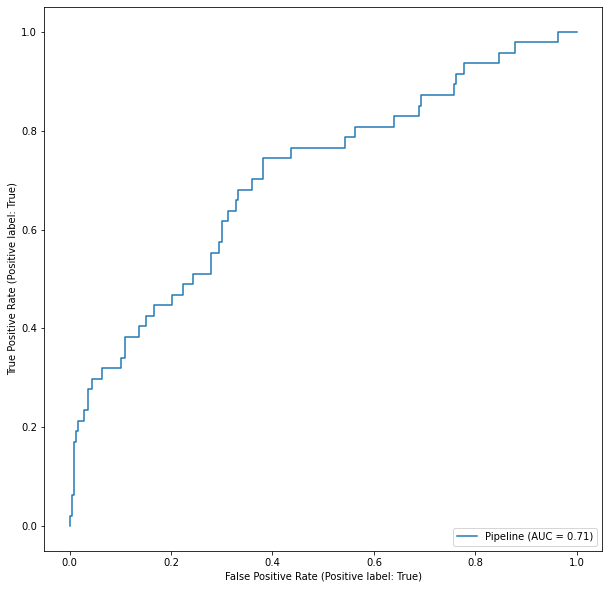

In [30]:
print('MLP Classifier')
print(classification_report(y_test, mlp_pipeline.predict_proba(X_test)[:,1] >.5))


fig,ax = plt.subplots(figsize=(10,10))
RocCurveDisplay.from_estimator(mlp_pipeline, X_test, y_test,ax=ax)

SVM - SVC
              precision    recall  f1-score   support

       False       0.84      0.99      0.91       247
        True       0.00      0.00      0.00        47

    accuracy                           0.83       294
   macro avg       0.42      0.50      0.45       294
weighted avg       0.70      0.83      0.76       294



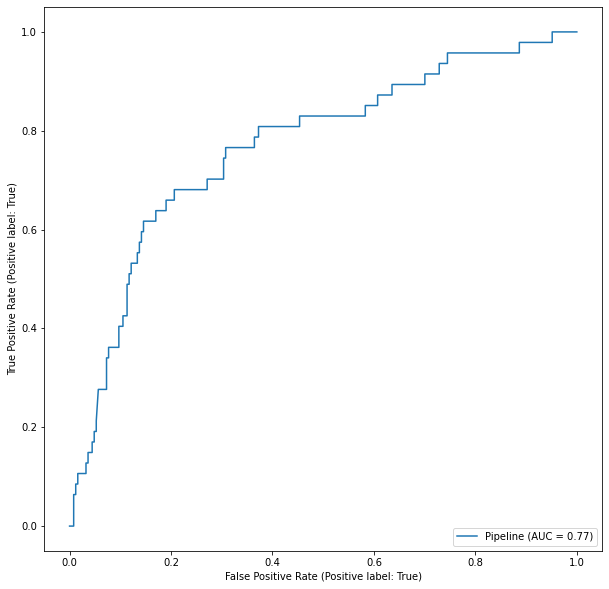

In [31]:
print('SVM - SVC')
print(classification_report(y_test, svc_pipeline.predict_proba(X_test)[:,1] >.7))

fig,ax = plt.subplots(figsize=(10,10))
RocCurveDisplay.from_estimator(svc_pipeline, X_test, y_test,ax=ax)

Decission Tree
              precision    recall  f1-score   support

       False       0.87      0.88      0.88       247
        True       0.34      0.32      0.33        47

    accuracy                           0.79       294
   macro avg       0.61      0.60      0.60       294
weighted avg       0.79      0.79      0.79       294



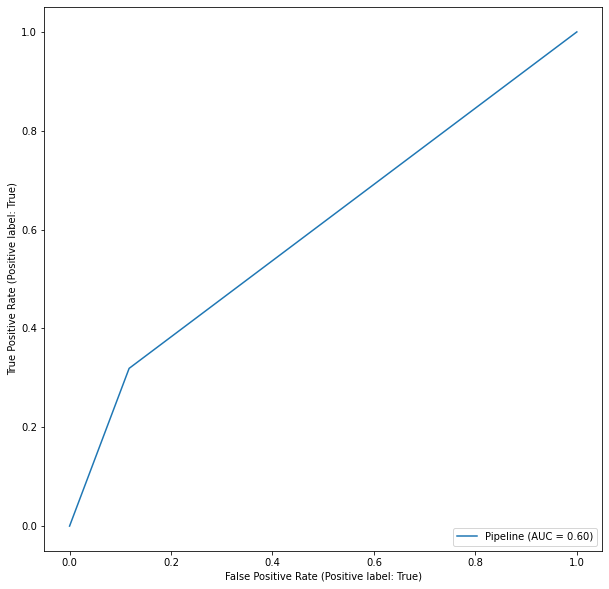

In [32]:
print('Decission Tree')
print(classification_report(y_test, dt_pipeline.predict(X_test)))

fig,ax = plt.subplots(figsize=(10,10))
RocCurveDisplay.from_estimator(dt_pipeline, X_test, y_test,ax=ax)

In [33]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [34]:
models_pipe = [dt_pipeline, ada_pipeline, svc_pipeline, mlp_pipeline]

def evaluate_m(model):
    report= cross_validate(model, X_train, y_train, cv=5, scoring=['roc_auc'])
    print(model[-1].__class__.__name__)
    print('mean')
    print(pd.DataFrame(report).mean())
    print()
    print('std')
    print(pd.DataFrame(report).std()) 
    print('*'*50)

In [35]:
for model in models_pipe:
    evaluate_m(model)

DecisionTreeClassifier
mean
fit_time        0.021220
score_time      0.008225
test_roc_auc    0.639345
dtype: float64

std
fit_time        0.001641
score_time      0.001280
test_roc_auc    0.042117
dtype: float64
**************************************************
AdaBoostClassifier
mean
fit_time        0.147418
score_time      0.017702
test_roc_auc    0.802521
dtype: float64

std
fit_time        0.015367
score_time      0.003782
test_roc_auc    0.068939
dtype: float64
**************************************************
SVC
mean
fit_time        0.103628
score_time      0.019450
test_roc_auc    0.760964
dtype: float64

std
fit_time        0.006393
score_time      0.007483
test_roc_auc    0.046594
dtype: float64
**************************************************
MLPClassifier
mean
fit_time        1.014251
score_time      0.005842
test_roc_auc    0.757317
dtype: float64

std
fit_time        0.023810
score_time      0.003299
test_roc_auc    0.039064
dtype: float64
***************************

Dari hasil evaluasi model yang diberikan, dapat diketahui bahwa model yang diberikan memiliki performa yang baik adalah AdaboostClassifier. 

In [36]:
#Gridsearch untuk adaboost

gs= GridSearchCV(ada_pipeline, 
    param_grid={
        'model__base_estimator': [RandomForestClassifier(n_estimators=8, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, random_state=0)],
        'model__n_estimators':[32,64,128],
        'model__learning_rate':[0.1,0.05,0.001]}, 
        cv=5, scoring='roc_auc')

gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)



0.8119881691615596
{'model__base_estimator': RandomForestClassifier(max_depth=5, max_features=None, n_estimators=8,
                       random_state=0), 'model__learning_rate': 0.05, 'model__n_estimators': 64}


In [37]:
evaluate_m(gs.best_estimator_)

AdaBoostClassifier
mean
fit_time        2.267690
score_time      0.105120
test_roc_auc    0.813844
dtype: float64

std
fit_time        0.070447
score_time      0.013646
test_roc_auc    0.046645
dtype: float64
**************************************************


In [38]:
evaluate_m(ada_pipeline)

AdaBoostClassifier
mean
fit_time        0.130322
score_time      0.018498
test_roc_auc    0.802521
dtype: float64

std
fit_time        0.006656
score_time      0.003397
test_roc_auc    0.068939
dtype: float64
**************************************************


# 9. Model Saving
      > Dengan melihat hasil evaluasi model, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan deployment di Heroku.
   
   

In [39]:
import pickle
#Simpan di dalam pickle
with open('pipeline.pkl', 'wb') as f:
    pickle.dump(gs.best_estimator_,f)

model=gs.best_estimator_

Adaboost
              precision    recall  f1-score   support

       False       0.86      0.98      0.92       247
        True       0.60      0.13      0.21        47

    accuracy                           0.85       294
   macro avg       0.73      0.56      0.56       294
weighted avg       0.81      0.85      0.80       294



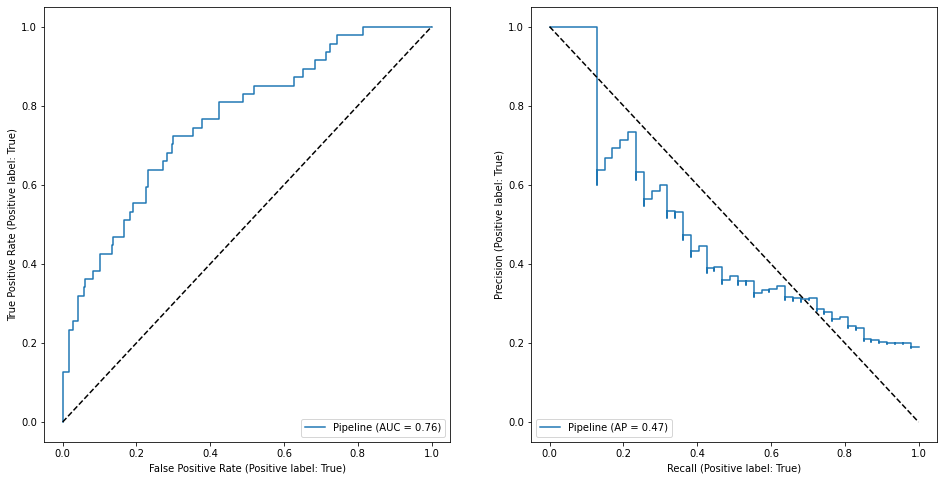

In [40]:

print('Adaboost')

#tunning model untuk melihat resistensi
print(classification_report(y_test, model.predict_proba(X_test)[:,1] >.5))


fig,ax = plt.subplots(1, 2, figsize=(8 * 2, 8))
RocCurveDisplay.from_estimator(model, X_test, y_test,ax=ax[0])
PrecisionRecallDisplay.from_estimator(model, X_test, y_test,ax=ax[1])
ax[0].plot([0,1],[0,1], 'k--')
ax[1].plot([0,1],[1,0], 'k--')

- Dari grafik Area Under Cruve dan Presicion Recall, kita dapat melihat bahwa model yang kita miliki bisa di tuning kembali sesuai dengan kebutuhan industri, pada bagian mana yang akan kita fokuskan untuk melakukan tuning.

- jika threshold yang kita pakai tidak sesuai dengan yang diharapkan, maka kita bisa menyesuaikan penyesuaian threshold agar mendapatkan peningkatan performa precision atau recall sesuai dengan kebutuhan yang di tetapkan.

- tetapi pada library sklern belum bisa melakukan setting threshold, untuk saat ini saya hanya bisa memperlihatkan clasification report yang sudah di tuning, untuk menyesuaikan threshold namun tidak bisa di simpan sebagai hyperparameter pada model.

In [41]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import FunctionTransformer

# _model = Pipeline([
#     ('model', model),
#     ('threshold', [FunctionTransformer(lambda x: x > .5)])
# ])

# _model.predict_proba(df_inf)

#   10. Model Inference
       > Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.
 

In [42]:
df_inf.T

,0
Age,39
Attrition,No
BusinessTravel,Travel_Rarely
DailyRate,835
Department,Research & Development
DistanceFromHome,19
Education,4
EducationField,Other
EmployeeCount,1
EmployeeNumber,1871


In [43]:
model.predict(df_inf)

array([False])

In [44]:
model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipe_num', StandardScaler(),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education', 'EmployeeCount',
                                                   'EmployeeNumber',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'RelationshipSatisfaction',
          

 #   11. Pengambilan Kesimpulan
       > Pada bagian terakhir ini, **harus berisi** kesimpulan yang mencerminkan hasil yang didapat dengan *objective* yang sudah ditulis di bagian pengenalan.

> Dataset yang kita miliki sangat imbalance dengan jumlah data yang tidak sama, sehingga kita harus melakukan proses balancing data agar data yang tidak sama dapat diterapkan pada model yang sama. Tetapi hal ini membuat model kita kurang stabil, karena kita harus melakukan proses tuning untuk menyesuaikan model yang kita miliki.

> Dari model yang saya gunakan sebagai baseline, kita dapat melihat bahwa model `Adaboost` memiliki performa yang baik, setelah melakukan gridsearch di dapatkan hyperparameter terbaik menurut asumsi saya.

    - AdaBoostClassifier
            - (base_estimator=RandomForestClassifier
                        - (max_depth=5,max_features=None,n_estimators=8,random_state=0),
            - learning_rate=0.05, 
            - n_estimators=64

    - Melakukan tunning pada algoritma AdaBoost sangat Tricky di dalam base estimator ada model `Randomforest` yang memiliki parameter yang banyak, sehingga kita harus melakukan tuning pada parameter yang banyak.

    

> Model yang kita miliki

In [45]:
print('Adaboost ')

#tunning model untuk melihat resistensi
print(classification_report(y_test, model.predict(X_test)))

Adaboost 
              precision    recall  f1-score   support

       False       0.86      0.98      0.92       247
        True       0.60      0.13      0.21        47

    accuracy                           0.85       294
   macro avg       0.73      0.56      0.56       294
weighted avg       0.81      0.85      0.80       294



- Model ini bisa mendeteksi Recall False Positive dengan sangat baik mencapai 99% yang artinya bisa melihat orang yang tidak berfikir untuk resign dengan akurasi yang baik.
- Jadi kita bisa melakukan treatment kepada orang yang tidak terdeteksi false positif untuk di pertahankan pada perusahaan dan bisa memberikan development karir untuk orang yang sudah loyal kepada perusahaan